# Regressão Linear com Zombie Health
## Idade x Dias de Recuperação

Importando o arquivo CSV com o Pandas.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../../data/zombie/raw/zombie-health-age-days-recovery.csv')
df.head(10)

name  age  days_recovery
0        Rot Donnadd   43              9
1          Pid Mught   38              7
2      Thulk Lebbimp   63             10
3    Bouvossam Damme   71             13
4          Pirg Zall   48              7
5  Nullon Rackindock   23              5
6    Shor Splitturch   35              7
7         Ger Ackeng   66             11
8      Gleldo Shruck   45              8
9      Nadross Pilch   60              8

## Scatter plot da Idade x Dias de Recuperação

<AxesSubplot:xlabel='age', ylabel='days_recovery'>

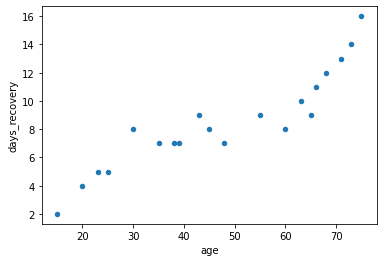

In [2]:
df.plot.scatter(x='age', y='days_recovery')

## Estimando a Regressão Linear usando Least Squares  (via SciPy)

In [3]:
from scipy import stats
x = df['age']
y = df['days_recovery']
a, b, r, p, std_err = stats.linregress(x, y)

## Plotando a função linear estimada x dados da amostra

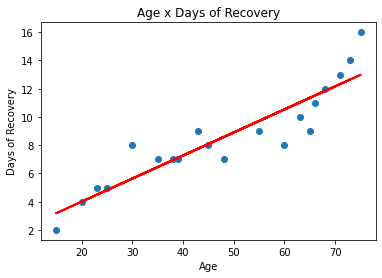

In [4]:
def estimate_y(x):
  return a * x + b

df['y_estimated'] = df['age'].apply(estimate_y)

plt.figure()
plt.plot(df['age'], df['days_recovery'], 'o')
plt.plot(df['age'], df['y_estimated'], 'r', linewidth=2)
plt.xlabel('Age')
plt.ylabel('Days of Recovery')
plt.title('Age x Days of Recovery')

plt.show()

## Intercept, Height e R2

In [5]:
print("Intercept: %f" % a)
print("Age: %f" % b)
print("R-squared: %f" % r**2)

Intercept: 0.163388
Age: 0.731874
R-squared: 0.836479


## Estimando a Regressão Linear usando Ordinary Least Squares (OLS) - via Statsmodels

In [7]:
from statsmodels.formula.api import ols

model = ols("days_recovery ~ age", data=df)
response = model.fit()
response.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          days_recovery   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     92.08
Date:                Tue, 11 May 2021   Prob (F-statistic):           1.68e-08
Time:                        16:10:01   Log-Likelihood:                -34.472
No. Observations:                  20   AIC:                             72.94
Df Residuals:                      18   BIC:                             74.94
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7319      0.875      0.836      0.414      -1.107       2.571
age            0.1634      0.017      9.596      0.000       0.128       0.199
==============================================================================
Omnibus:                        0.502   Durbin-Watson:                   2.394
Prob(Omnibus):                  0.778   Jarque-Bera (JB):                0.112
Skew:                           0.183   Prob(JB):                        0.946
Kurtosis:                       2.976   Cond. No.                         141.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""